# Overview:

In this project, we will be looking at the player data provided by FIFA which contains information
such as personal details, wages, physical attributes, technical skills, potential and their positional
strengths. This is primarily data of FIFA 2018.Through this project, you will get a glimpse of
insights behind the beautiful game and the kind of information and decisions a football manager
goes through. 

In [1]:
# Importing Key Libraries

import numpy as np
import pandas as pd
# import dateutil
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)   # adding a nice background to the graphs
sns.set(style="whitegrid", palette="hsv")
import warnings
warnings.filterwarnings("ignore")
# from PIL import Image


In [2]:
# Loading of the FIFA Datasets 

# fifa_data = pd.read_csv('e:/pgp01_project/fifa.csv')
# fifa_data = pd.read_csv('e:/pgp01_project/fifa.csv', 'r')

# Unicode Decode Error on reading input CSV file, requires determination of what Character Encoding is applicable.

fifa_data = 'e:/pgp01_project/fifa.csv'          

# fifa_analysis = pd.read_csv(fifa_data)

import chardet
with open(fifa_data, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(1000000))
result

{'encoding': 'Windows-1254',
 'confidence': 0.3767401308834869,
 'language': 'Turkish'}

In [3]:
# Read Input CSV file with standard Character Encoding; 
# 'encoding': 'Windows-1254' is erronous; 'Confidence': is low & 'language':'Turkish' is nit true !

Fdata_01 = pd.read_csv(fifa_data, encoding='ISO-8859-1')
Fdata_01.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check Size and Shape of the dataset

print (Fdata_01.size)
print (Fdata_01.shape)

1330594
(17981, 74)


In [5]:
# Load data from csv file into a DataFrame
# df_items = pd.DataFrame.from_csv('e:/pgp_projects/glp01_item.csv')

Fdata_02 = pd.DataFrame(Fdata_01)
Fdata_02.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Load data from csv file into a DataFrame
# df_items = pd.DataFrame.from_csv('e:/pgp_projects/glp01_item.csv')

# fifa_data = pd.DataFrame(fifa_data)
# Fdata_02.head()

In [7]:
# Check Column Details

Fdata_02.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [8]:
# Check DataFrame Information

Fdata_02.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 74 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

In [9]:
print(Fdata_02.isnull().sum())

Unnamed: 0                0
Name                      0
Age                       0
Photo                     0
Nationality               0
Flag                      0
Overall                   0
Potential                 0
Club                    248
Club Logo                 0
Value                     0
Wage                      0
Special                   0
Acceleration              0
Aggression                0
Agility                   0
Balance                   0
Ball control              0
Composure                 0
Crossing                  0
Curve                     0
Dribbling                 0
Finishing                 0
Free kick accuracy        0
GK diving                 0
GK handling               0
GK kicking                0
GK positioning            0
GK reflexes               0
Heading accuracy          0
                       ... 
Strength                  0
Vision                    0
Volleys                   0
CAM                    2029
CB                  

In [10]:
# Check number of countries included in the dataset by accessing it as an individual series

Fdata_02_Nat = Fdata_02['Nationality']
Fdata_02_Nat.head()

0     Portugal
1    Argentina
2       Brazil
3      Uruguay
4      Germany
Name: Nationality, dtype: object

# Que 1a: Calculating the Top 10 Countries with most number of Players (by Nationality) ranked or ordered by no. of players

Check Nationality


In [11]:
# Calculating the Top 10 Countries with most number of Players (by Nationality) ranked or ordered by no. of players

Fdata_02['Nationality'].value_counts().head(10)

# Fdata_02['Nationality'].value_counts() ..list sum of players by Nationality for all players in table.

England        1630
Germany        1140
Spain          1019
France          978
Argentina       965
Brazil          812
Italy           799
Colombia        592
Japan           469
Netherlands     429
Name: Nationality, dtype: int64

In [12]:
# List of 5 Countries with most number of footballers playing at this top level.

Fdata_02['Nationality'].value_counts().head(5)

England      1630
Germany      1140
Spain        1019
France        978
Argentina     965
Name: Nationality, dtype: int64


# Que 2: Interpreting the age at which a player stops improving - Compare current rating and future rating




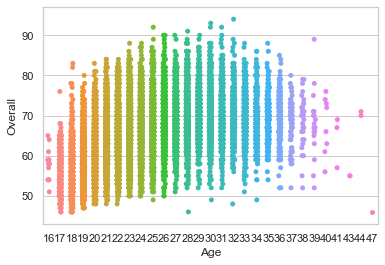

In [13]:
# Assessing the Overall Performance rating by Age-profile of the playes ranked by FIFA.

sns.stripplot(Fdata_02['Age'],  Fdata_02['Overall'], jitter=True);

# Shows best performance peaks at between age 23 to 30-31,and starts to decline after that.

Insight: Shows best performance peaks at between age 23 to 30-31,and starts to decline after that.

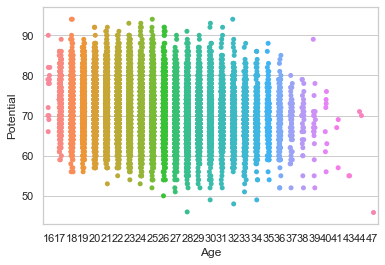

In [14]:
# Assessing the Performanace of the players ranked by FIFA by Age

sns.stripplot(Fdata_02['Age'],  Fdata_02['Potential'], jitter=True);

# Potential of the players is highest from age 23 to about 32 and after that, there are fewer players that are highly ranked.

Insight : Potential of the players is highest from age 23 to about 32 and after that, there are fewer players that are highly ranked.

In [15]:
# Calculate improvement rate based on age

Fdata_02['Improvement'] = Fdata_02['Potential'] - Fdata_02['Overall']
Fdata_02

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Improvement
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,2
3,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0,0
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
7,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0,1
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,72.0,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0,0
9,9,G. HiguaÃ­n,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0,0


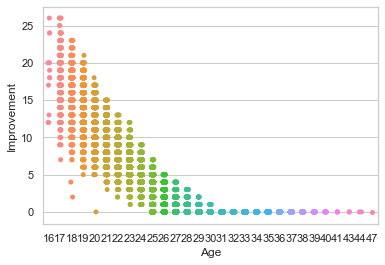

In [16]:
# Visualize improvement rate based on age
sns.stripplot(Fdata_02['Age'],  Fdata_02['Improvement'], jitter=True);

# After Age 30, there is literrally no improvement !!

Insight & Conclusion : After Age 30, there is literrally no improvement !!


# Que 3: Which type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger? Visualize through a scatter plot for all the three - 10



In [17]:
# Create column for single preffered position
Fdata_02['Position'] = Fdata_02['Preferred Positions'].apply(lambda x:x[:3])

In [18]:
# Confirm creation of new column
Fdata_02.columns.values

array(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage',
       'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing',
       'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina',
       'Standing tackle', 'Strength', 'Vision', 'Volleys', 'CAM', 'CB',
       'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM',
       'LS', 'LW', 'LWB', 'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'Improvement',
       'Position'], dtype=object)

In [19]:
# Confirm that for new column created that there are 15 unique positions
Fdata_02.Position.unique()

array(['ST ', 'RW ', 'LW ', 'GK ', 'CDM', 'CB ', 'RM ', 'CM ', 'LM ',
       'LB ', 'CAM', 'RB ', 'CF ', 'RWB', 'LWB'], dtype=object)

In [20]:
# Select one position for a player out of the different possible preffered positions for a player.

Fdata_03 = Fdata_02.loc[Fdata_02['Position'].isin(['ST ', 'LW ', 'RW ']) ]

In [21]:
# Check selected postion types.

Fdata_03.Position.unique()

array(['ST ', 'RW ', 'LW '], dtype=object)

In [22]:
# Set Position field as Index

Fdata_03.set_index("Position")

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Improvement
Position,,,,,,,,,,,,,,,,,,,,,
ST,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,0
RW,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,0
LW,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,2
ST,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,0
ST,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0,0
LW,7,E. Hazard,26,https://cdn.sofifa.org/48/18/players/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,90,91,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,47.0,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0,1
ST,9,G. HiguaÃ­n,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0,0
RW,15,G. Bale,27,https://cdn.sofifa.org/48/18/players/173731.png,Wales,https://cdn.sofifa.org/flags/50.png,89,89,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,67.0,81.0,71.0,87.0,87.0,87.0,87.0,74.0,87.0,0
ST,16,S. AgÃ¼ero,29,https://cdn.sofifa.org/48/18/players/153079.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,89,Manchester City,https://cdn.sofifa.org/24/18/teams/10.png,...,44.0,75.0,54.0,87.0,84.0,86.0,86.0,57.0,86.0,0


In [23]:
Fdata_03.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST', 'Improvement', 'Position'],
      dtype='object')

In [24]:
#Check single position for ranking 
Fdata_03.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RCM,RDM,RF,RM,RS,RW,RWB,ST,Improvement,Position
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,0,ST
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,0,RW
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,2,LW
3,3,L. SuÃ¡rez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,0,ST
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0,0,ST


Edit Wages field from the FIFA data-file as it has some wrong data field values, fix errors, clean up the file to make Wages field  numeric. Convert Obj to Int

In [25]:
# Use Regular Expressions functionality to clean-up & fix Wages field

import re

text_to_search= '''
K
E00.0

'''

In [26]:
# Search for 'K' character in the Wage field and remove it.

pattern = re.compile(r'K')
matches = pattern.finditer(text_to_search)
for mat in matches:
    print(mat)


<_sre.SRE_Match object; span=(1, 2), match='K'>


In [27]:
print (text_to_search[1:2]) 

K


In [28]:
Fdata_03.Wage.apply(lambda x: x.strip('K'))

0        565
1        565
2        280
3        510
5        355
7        295
9        275
15       370
16       325
19       215
21       150
23       165
28       265
31       240
32       225
38       160
46       165
50       210
52       190
55       120
58       235
61       135
64       295
66       175
72       115
73       180
83       145
93       175
97       175
100      105
        ... 
17739      1
17754      1
17765      2
17779      1
17795      1
17799      2
17800      1
17809      1
17821      1
17823      1
17827      1
17841      1
17845      1
17850      1
17860      1
17861      1
17869      1
17877      1
17878      1
17881      1
17882      1
17884      1
17885      1
17915      2
17944      2
17948      1
17969      1
17971      2
17978      1
17980      1
Name: Wage, Length: 3133, dtype: object

In [29]:
#  Change Wage field from Object to Numeric

Fdata_03['Wage_Num'] = Fdata_03['Wage'].str[-2].astype('int')

In [30]:
DataTypeObj1 = Fdata_03.dtypes['Wage']
print(DataTypeObj1)

object


In [31]:
DataTypeObj2 = Fdata_03.dtypes['Wage_Num']
print(DataTypeObj2)

int32


In [32]:
Fdata_Off_Plyrs = print(Fdata_03.loc[Fdata_03['Position'].isin(['LW ','ST ','RW '])])

       Unnamed: 0               Name  Age  \
0               0  Cristiano Ronaldo   32   
1               1           L. Messi   30   
2               2             Neymar   25   
3               3         L. SuÃ¡rez   30   
5               5     R. Lewandowski   28   
7               7          E. Hazard   26   
9               9        G. HiguaÃ­n   29   
15             15            G. Bale   27   
16             16         S. AgÃ¼ero   29   
19             19          P. Dybala   23   
21             21       A. Griezmann   26   
23             23      P. Aubameyang   28   
28             28           M. Ãzil   28   
31             31    Z. IbrahimoviÄ   35   
32             32          A. Robben   33   
38             38          E. Cavani   30   
46             46            H. Kane   23   
50             50          R. Lukaku   24   
52             52         T. MÃ¼ller   27   
55             55            M. Reus   28   
58             58        Diego Costa   28   
61        

In [33]:
Fdata_03.count()

Unnamed: 0             3133
Name                   3133
Age                    3133
Photo                  3133
Nationality            3133
Flag                   3133
Overall                3133
Potential              3133
Club                   3109
Club Logo              3133
Value                  3133
Wage                   3133
Special                3133
Acceleration           3133
Aggression             3133
Agility                3133
Balance                3133
Ball control           3133
Composure              3133
Crossing               3133
Curve                  3133
Dribbling              3133
Finishing              3133
Free kick accuracy     3133
GK diving              3133
GK handling            3133
GK kicking             3133
GK positioning         3133
GK reflexes            3133
Heading accuracy       3133
                       ... 
CAM                    3133
CB                     3133
CDM                    3133
CF                     3133
CM                  

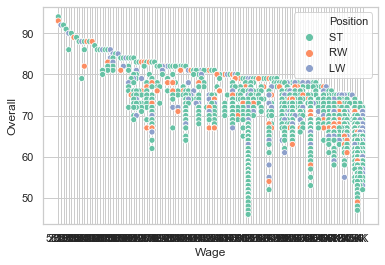

In [34]:
# Visualization of pay vis-a-vis type of offensive players i.e. Striker (ST) Right-Winger(RW) and Left-Winger(LW)

sns.scatterplot(Fdata_03['Wage'], Fdata_03['Overall'], hue = Fdata_03['Position'], palette = 'Set2')

Notes: Insight & Conclusion
1. Scatter Plot above compares pay amongst the offensive players Striker (ST) Right-Winger(RW) and Left-Winger(LW) and shows that more Strikers earn more than Right-Wingers & Left-wingers.  


2. Although Scatter Plot shows the comparison between pay amonst the offensive players (ST, RW & LW), the other plots i.e. pointplot & boxplot show this comparison better !! 

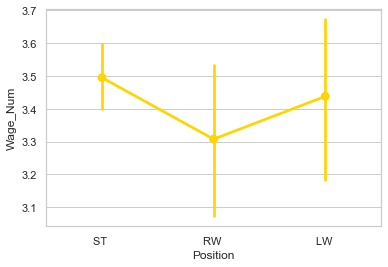

In [35]:
# Below comparison of pay amongst Offensive players for a Striket (ST) Right-Winger(RW) and Left-Winger(LW) using pointplot shows the difference better


sns.pointplot(Fdata_03['Position'], Fdata_03['Wage_Num'])

** Insight & Conclusion : Strickers earn more than Wingers (Left & Right), since the median point of pay for the Striker is higher that the other two types of players, as per the pointplot (above) & boxplot (below).
    

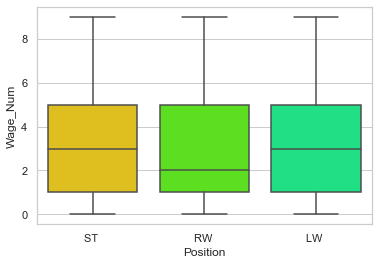

In [36]:
# Boxplot

sns.boxplot (Fdata_03['Position'],Fdata_03['Wage_Num']);

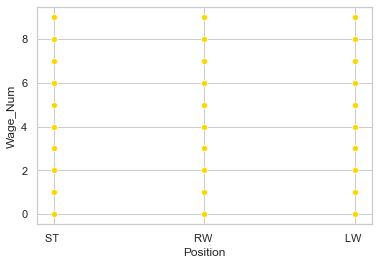

In [37]:
sns.scatterplot (Fdata_03['Position'],Fdata_03['Wage_Num']);

# ''' Que 4 : Top 5 players for every preffered position in terms of overall as well as potential points. Who were the best in 2018? - 10

'''

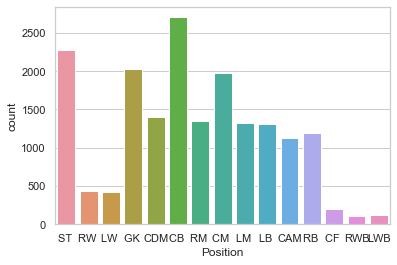

In [38]:
sns.countplot(Fdata_02['Position'])
plt.show()

In [39]:
Fdata_02.groupby(['Overall', 'Potential']).sum()

Unnamed: 0  Age  Special     CAM     CB    CDM      CF  \
Overall Potential                                                           
46      46              35952   75     2006    44.0   38.0   42.0    42.0   
        56              17974   18     1105    32.0   45.0   41.0    33.0   
        58              17973   18     1267    46.0   42.0   43.0    46.0   
        61              17978   17     1194    44.0   28.0   29.0    45.0   
        63              17976   17      755     0.0    0.0    0.0     0.0   
        64              35959   36     2333    74.0   91.0   85.0    72.0   
47      56              17970   19     1208    37.0   46.0   43.0    37.0   
        58              17963   19     1298    44.0   48.0   48.0    42.0   
        59              17958   17     1189    34.0   47.0   43.0    35.0   
        61              35922   35     2545    86.0   88.0   91.0    85.0   
        63              35934   37     2533    76.0   91.0   83.0    78.0   
        64              17959   18     1330    47.0   40.0   44.0    47.0   
        65              17971   18     1265    48.0   32.0   33.0    49.0   
        67              71866   73     5077   177.0  168.0  167.0   172.0   
        68              17968   17     1143    31.0   46.0   40.0    32.0   
        69              17960   18     1290    46.0   41.0   43.0    44.0   
        73              17961   17     1132    32.0   46.0   42.0    32.0   
48      48              17946   32     1253    47.0   42.0   47.0    44.0   
        56              17947   18     1257    39.0   48.0   44.0    39.0   
        57              17937   22      848     0.0    0.0    0.0     0.0   
        58              35885   41     1927     0.0    0.0    0.0     0.0   
        59              35874   35     2425    93.0   59.0   66.0    94.0   
        60              17949   19      874     0.0    0.0    0.0     0.0   
        61              17945   20      833     0.0    0.0    0.0     0.0   
        63              35895   36     2128    47.0   48.0   48.0    46.0   
        64              53852   54     3771   123.0  123.0  121.0   123.0   
        66              17941   19     1350    47.0   46.0   47.0    46.0   
        67              35896   36     2123    46.0   44.0   46.0    45.0   
        68              53832   54     3974   142.0  121.0  128.0   142.0   
        69              35886   34     2365    78.0   74.0   73.0    80.0   
...                       ...  ...      ...     ...    ...    ...     ...   
85      85               1083  395    24202   715.0  768.0  769.0   707.0   
        86                156   53     4121   168.0  109.0  132.0   163.0   
        87                163   53     4247   156.0  152.0  159.0   151.0   
        88                150   51     3310    81.0   54.0   60.0    83.0   
        89                149   50     3412    74.0   83.0   84.0    72.0   
        90                 69   23     1991    82.0   45.0   56.0    83.0   
        92                 70   24     1875    64.0   83.0   79.0    62.0   
86      86                910  451    29487  1053.0  943.0  989.0  1052.0   
        87                 56   28     2047    67.0   84.0   81.0    67.0   
        88                100   51     4485   157.0  161.0  163.0   155.0   
        89                101   50     4167   168.0  102.0  125.0   166.0   
        90                144   72     6159   241.0  171.0  190.0   246.0   
87      87                369  273    18185   647.0  556.0  599.0   640.0   
        90                 33   26     2154    78.0   81.0   84.0    76.0   
        91                 70   49     4218   167.0  130.0  152.0   159.0   
        92                 35   24     2238    84.0   74.0   79.0    83.0   
88      88                275  303    19555   677.0  619.0  646.0   667.0   
        90                 22   26     2185    86.0   66.0   76.0    83.0   
        91                 21   26     2104    84.0   48.0   57.0    85.0   
        93     

In [40]:
Fdata_02['COUNTER'] =1       #initially, set that counter to 1.
group_data = Fdata_02.groupby(['Position','Overall', 'Potential'])['COUNTER'].sum() #sum function
print(group_data)

Position  Overall  Potential
CAM       47       64            1
                   69            1
          48       48            1
                   59            1
                   68            1
          49       61            1
                   63            1
                   66            1
          50       59            1
                   66            3
                   74            1
          51       59            1
                   60            1
                   63            1
                   64            2
                   68            1
          52       60            1
                   64            1
                   66            2
                   67            2
                   68            1
                   70            1
                   73            2
          53       60            1
                   61            1
                   62            1
                   64            3
                   65     

In [41]:
Fdata_04= Fdata_02.groupby(['Overall', 'Potential']).sum()
#Fdata_04.sort_values('Overall', ascending=False)
Fdata_04.sort_index(ascending=False)
print(Fdata_04)

                   Unnamed: 0  Age  Special     CAM     CB    CDM      CF  \
Overall Potential                                                           
46      46              35952   75     2006    44.0   38.0   42.0    42.0   
        56              17974   18     1105    32.0   45.0   41.0    33.0   
        58              17973   18     1267    46.0   42.0   43.0    46.0   
        61              17978   17     1194    44.0   28.0   29.0    45.0   
        63              17976   17      755     0.0    0.0    0.0     0.0   
        64              35959   36     2333    74.0   91.0   85.0    72.0   
47      56              17970   19     1208    37.0   46.0   43.0    37.0   
        58              17963   19     1298    44.0   48.0   48.0    42.0   
        59              17958   17     1189    34.0   47.0   43.0    35.0   
        61              35922   35     2545    86.0   88.0   91.0    85.0   
        63              35934   37     2533    76.0   91.0   83.0    78.0   

## Que 5: Which club(s) have the maximum share of players from England? Which club(s) have the maximum share of players from Spain? Which club(s) have the maximum share of players from Germany? - 10 

In [42]:
# Select players from the countries with the three Nationalities of England, Spain and Germany.

Fdata_02.loc[Fdata_02['Nationality'].isin(['England','Spain','Germany']), ['Club', 'Name', 'Nationality', ]]

,Club,Name,Nationality
4,FC Bayern Munich,M. Neuer,Germany
6,Manchester United,De Gea,Spain
8,Real Madrid CF,T. Kroos,Germany
10,Real Madrid CF,Sergio Ramos,Spain
22,FC Bayern Munich,Thiago,Spain
25,FC Bayern Munich,J. Boateng,Germany
27,FC Bayern Munich,M. Hummels,Germany
28,Arsenal,M. Ãzil,Germany
42,Manchester City,David Silva,Spain
44,FC Barcelona,PiquÃ©,Spain


In [43]:
Fdata_05 = Fdata_02.loc[Fdata_02['Nationality'].isin(['England','Spain','Germany']), ['Club', 'Name', 'Nationality', ]]

In [44]:
# Check no. of players with the three nationalities (of England, Spain and Germany).

Fdata_05.shape[0]

3789

In [45]:
# Group players by Nationality and Clubs.

Fdata_05['Nationality'].groupby([Fdata_05['Nationality'],Fdata_05['Club']]).count()

Nationality  Club                     
England      1. FC Kaiserslautern          1
             AFC Eskilstuna                2
             AFC Wimbledon                20
             Aberdeen                      5
             Accrington Stanley           17
             Arsenal                      11
             Aston Villa                  15
             Atlanta United FC             3
             Barnet                       20
             Barnsley                     20
             Birmingham City              18
             Blackburn Rovers             16
             Blackpool                    19
             Bolton Wanderers             24
             Borussia Dortmund             1
             Borussia MÃ¶nchengladbach     1
             Bournemouth                  20
             Bradford City                21
             Brentford                    11
             Brighton & Hove Albion       10
             Brisbane Roar                 1
             Bri

In [46]:
# Group players by Club and Nationality. Sort by nationalities per club to show maximum share of players from the three countries.

Fdata_05['Club'].groupby([Fdata_05['Club'], Fdata_05['Nationality']]).count().sort_values(ascending=False)

Club                       Nationality
CA Osasuna                 Spain          27
Holstein Kiel              Germany        26
Athletic Club de Bilbao    Spain          26
UD Las Palmas              Spain          25
Lorca Deportiva CF         Spain          25
Real Valladolid            Spain          25
Real Sociedad              Spain          24
Bolton Wanderers           England        24
Shrewsbury                 England        24
CD Lugo                    Spain          24
SD Eibar                   Spain          24
Real Sporting de GijÃ³n    Spain          24
RCD Espanyol               Spain          24
FC Barcelona B             Spain          24
Levante UD                 Spain          24
CÃ³rdoba CF                Spain          23
Chemnitzer FC              Germany        23
SV Meppen                  Germany        23
CD Numancia                Spain          23
FC Carl Zeiss Jena         Germany        23
FSV Zwickau                Germany        23
Hallescher FC   

In [47]:
# Group players by Club and Nationality. Sort by number of players by nationalities per club showing maximum share of players from the three countries.

Fdata_05['Nationality'].groupby([Fdata_05['Nationality'], Fdata_05['Club']]).count().sort_values(ascending=False)

Nationality  Club                     
Spain        CA Osasuna                   27
             Athletic Club de Bilbao      26
Germany      Holstein Kiel                26
Spain        Real Valladolid              25
             Lorca Deportiva CF           25
             UD Las Palmas                25
             FC Barcelona B               24
             Real Sociedad                24
             CD Lugo                      24
             SD Eibar                     24
             RCD Espanyol                 24
England      Shrewsbury                   24
             Bolton Wanderers             24
Spain        Real Sporting de GijÃ³n      24
             Levante UD                   24
Germany      Hallescher FC                23
             SpVgg Unterhaching           23
             Karlsruher SC                23
             FC Carl Zeiss Jena           23
             SV Meppen                    23
             Chemnitzer FC                23
             FSV

### Conclusion:

#### Club(s) with the  maximum share of players from the three countries of England, Spain & Germany are:
    1. England - Shrewsbury & Bolton Wanderers   (with 24 players)
    2. Spain   - CA Osasuna                      (with 27 players) 
    3. Germany - Holstein Kiel                   (with 26 players)
    

## Que 6:
    
As a National coach of France team you want to compare the national team of England, Spain, Italy and Germany to understand the competition. The formation of the teams is restricted to 4-3-3 (4 defenders, 3 midfielders, 3 forwards, 1 Goal Keeper) and players with overall value of more than 75 are preferred, now form the best team for each of the mentioned countries and compare them. Note down all the insights that you as a business analyst should share with the coach. - 20 

Note: -

•	Pick out the best players based on the overall rating while selecting the players. In case of a tie, select the most important tiebreaker attribute.

•	When we talk about formation, the nomenclature is as follows (Number of defenders Number of midfielders- number of forwards), goalkeeper will always be there in the team hence we don’t represent it in the formation.

Based on the positional requirement the above-mentioned positions can be treated equally while shortlisting the squad.
e.g. LW / ST – LW can be treated equally as striker. 



In [48]:
# Select players from the countries with the five Nationalities of France, England, Spain, Italy and Germany for comparison by the France coach.

Fdata_06 = Fdata_02.loc[Fdata_02['Nationality'].isin(['France','England','Spain','Italy', 'Germany'])]

In [49]:
Fdata_06.shape[0]

5566

In [50]:
Fdata_06.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST', 'Improvement', 'Position', 'COUNTER'],
      dtype='object')

In [51]:
Fdata_06.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RDM,RF,RM,RS,RW,RWB,ST,Improvement,Position,COUNTER
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,GK,1
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,GK,1
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,82.0,81.0,81.0,77.0,80.0,78.0,77.0,0,CDM,1
10,10,Sergio Ramos,31,https://cdn.sofifa.org/48/18/players/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,83.0,70.0,71.0,72.0,69.0,81.0,72.0,0,CB,1
17,17,G. Chiellini,32,https://cdn.sofifa.org/48/18/players/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,76.0,55.0,58.0,59.0,56.0,75.0,59.0,0,CB,1


In [52]:
Fdata_07 = Fdata_06.loc[Fdata_06['Overall'] >75]

In [53]:
# Select players from the five countries with Overall rating greater than 75.

Fdata_06.loc[Fdata_06['Overall'] >75]

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RDM,RF,RM,RS,RW,RWB,ST,Improvement,Position,COUNTER
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,GK,1
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,GK,1
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,82.0,81.0,81.0,77.0,80.0,78.0,77.0,0,CDM,1
10,10,Sergio Ramos,31,https://cdn.sofifa.org/48/18/players/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,83.0,70.0,71.0,72.0,69.0,81.0,72.0,0,CB,1
17,17,G. Chiellini,32,https://cdn.sofifa.org/48/18/players/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,76.0,55.0,58.0,59.0,56.0,75.0,59.0,0,CB,1
18,18,G. Buffon,39,https://cdn.sofifa.org/48/18/players/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,GK,1
21,21,A. Griezmann,26,https://cdn.sofifa.org/48/18/players/194765.png,France,https://cdn.sofifa.org/flags/18.png,88,91,AtlÃ©tico Madrid,https://cdn.sofifa.org/24/18/teams/240.png,...,57.0,85.0,84.0,85.0,86.0,60.0,85.0,3,LW,1
22,22,Thiago,26,https://cdn.sofifa.org/48/18/players/189509.png,Spain,https://cdn.sofifa.org/flags/45.png,88,90,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,76.0,83.0,83.0,77.0,83.0,75.0,77.0,2,CDM,1
24,24,L. Bonucci,30,https://cdn.sofifa.org/48/18/players/184344.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Milan,https://cdn.sofifa.org/24/18/teams/47.png,...,83.0,66.0,66.0,65.0,63.0,76.0,65.0,0,CB,1
25,25,J. Boateng,28,https://cdn.sofifa.org/48/18/players/183907.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,82.0,66.0,69.0,65.0,65.0,79.0,65.0,0,CB,1


In [54]:
Fdata_07.shape[0]

616

In [55]:
Fdata_07.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RDM,RF,RM,RS,RW,RWB,ST,Improvement,Position,COUNTER
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,GK,1
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,GK,1
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,82.0,81.0,81.0,77.0,80.0,78.0,77.0,0,CDM,1
10,10,Sergio Ramos,31,https://cdn.sofifa.org/48/18/players/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,83.0,70.0,71.0,72.0,69.0,81.0,72.0,0,CB,1
17,17,G. Chiellini,32,https://cdn.sofifa.org/48/18/players/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,76.0,55.0,58.0,59.0,56.0,75.0,59.0,0,CB,1


In [56]:
# Confirm Overall rating of players for the three countries.

Fdata_07.Overall.unique()

array([92, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 76], dtype=int64)

In [57]:
Fdata_07.Position.unique()

array(['GK ', 'CDM', 'CB ', 'LW ', 'RW ', 'CM ', 'LM ', 'ST ', 'CAM',
       'LB ', 'RB ', 'RM ', 'RWB', 'CF ', 'LWB'], dtype=object)

In [58]:
# Drop Goalkepeer as as position is not signification for selscting playing formation. 

Fdata_08 = Fdata_07.loc[Fdata_06['Position'] != 'GK ']

In [59]:
Fdata_08.shape[0]

547

In [60]:
# Group players by country by position by rating 

In [61]:
Fdata_08.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RDM,RF,RM,RS,RW,RWB,ST,Improvement,Position,COUNTER
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,82.0,81.0,81.0,77.0,80.0,78.0,77.0,0,CDM,1
10,10,Sergio Ramos,31,https://cdn.sofifa.org/48/18/players/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,83.0,70.0,71.0,72.0,69.0,81.0,72.0,0,CB,1
17,17,G. Chiellini,32,https://cdn.sofifa.org/48/18/players/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,76.0,55.0,58.0,59.0,56.0,75.0,59.0,0,CB,1
21,21,A. Griezmann,26,https://cdn.sofifa.org/48/18/players/194765.png,France,https://cdn.sofifa.org/flags/18.png,88,91,AtlÃ©tico Madrid,https://cdn.sofifa.org/24/18/teams/240.png,...,57.0,85.0,84.0,85.0,86.0,60.0,85.0,3,LW,1
22,22,Thiago,26,https://cdn.sofifa.org/48/18/players/189509.png,Spain,https://cdn.sofifa.org/flags/45.png,88,90,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,76.0,83.0,83.0,77.0,83.0,75.0,77.0,2,CDM,1


In [62]:
Fdata_08['Formation'] = Fdata_08.Position.apply(lambda x:1 if x in ['LW ','ST ', 'CF ', 'RW '] else 'Forward')
Fdata_08['Formation'] = Fdata_08.Position.apply(lambda x:1 if x in ['LM ','CM ', 'CDM', 'CAM', 'RM '] else 'Midfield')
Fdata_08['Formation'] = Fdata_08.Position.apply(lambda x:1 if x in ['LB ','LWB', 'CB ', 'RB ', 'RWB'] else 'Defender')

Fdata_08.head(n=20)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RF,RM,RS,RW,RWB,ST,Improvement,Position,COUNTER,Formation
8,8,T. Kroos,27,https://cdn.sofifa.org/48/18/players/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,81.0,81.0,77.0,80.0,78.0,77.0,0,CDM,1,Defender
10,10,Sergio Ramos,31,https://cdn.sofifa.org/48/18/players/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,70.0,71.0,72.0,69.0,81.0,72.0,0,CB,1,1
17,17,G. Chiellini,32,https://cdn.sofifa.org/48/18/players/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,55.0,58.0,59.0,56.0,75.0,59.0,0,CB,1,1
21,21,A. Griezmann,26,https://cdn.sofifa.org/48/18/players/194765.png,France,https://cdn.sofifa.org/flags/18.png,88,91,AtlÃ©tico Madrid,https://cdn.sofifa.org/24/18/teams/240.png,...,85.0,84.0,85.0,86.0,60.0,85.0,3,LW,1,Defender
22,22,Thiago,26,https://cdn.sofifa.org/48/18/players/189509.png,Spain,https://cdn.sofifa.org/flags/45.png,88,90,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,83.0,83.0,77.0,83.0,75.0,77.0,2,CDM,1,Defender
24,24,L. Bonucci,30,https://cdn.sofifa.org/48/18/players/184344.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Milan,https://cdn.sofifa.org/24/18/teams/47.png,...,66.0,66.0,65.0,63.0,76.0,65.0,0,CB,1,1
25,25,J. Boateng,28,https://cdn.sofifa.org/48/18/players/183907.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,66.0,69.0,65.0,65.0,79.0,65.0,0,CB,1,1
27,27,M. Hummels,28,https://cdn.sofifa.org/48/18/players/178603.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,69.0,70.0,69.0,68.0,78.0,69.0,0,CB,1,1
28,28,M. Ãzil,28,https://cdn.sofifa.org/48/18/players/176635.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,Arsenal,https://cdn.sofifa.org/24/18/teams/1.png,...,82.0,83.0,76.0,83.0,58.0,76.0,0,RW,1,Defender
33,33,N. KantÃ©,26,https://cdn.sofifa.org/48/18/players/215914.png,France,https://cdn.sofifa.org/flags/18.png,87,90,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,76.0,78.0,72.0,76.0,83.0,72.0,3,CM,1,Defender


In [64]:
# import pandas as pd

def Formation(c):
  if c['Position'] == ('LW ', 'ST ', 'CF ', 'RW '):
    return 'Forward'
  elif c['Position'] == ('LM ', 'CM ', 'CDM', 'CAM', 'RM '):
    return 'Midfield'
  elif 0.0 < c['Position'] == ('LB ', 'LWB', 'CB ', 'RB ', 'RWB'):
    return 'Defender'
  else:
    return 'Unknown'

Fdata_09 = Fdata_08

Fdata_09['Formation'] = Fdata_09.apply(Formation, axis=1)

TypeError: ("'<' not supported between instances of 'float' and 'str'", 'occurred at index 8')

In [65]:
Fdata_09 = Fdata_08
Fdata_09.loc['Formation'] = (['LW '], ['ST '], ['CF '], ['RW ']) = 'Forward'
Fdata_09.loc['Formation'] = ['LM ','CM ', 'CDM', 'CAM', 'RM '] = 'Midfield'
Fdata_09.loc['Formation'] = ['LB ','LWB', 'CB ', 'RB ', 'RWB'] = 'Defender'

Fdata_09 = print(Fdata_09.loc[Fdata_03['Position'].isin(['LW ','ST ','RW '])])

Fdata_08.head(n=20)

SyntaxError: can't assign to literal (<ipython-input-65-e4048743363f>, line 2)

#### file:///E:/PGP01_Project/Final_1/GLP01_GWA_FIFA%20Data%20Analysis%20Project%20(Q&A)_v02.html
        